✅ Connected to database
Shape: (1342, 11)


,product_name,category,main_category,discounted_price,actual_price,price_savings,discount_percent,rating,rating_count,popularity_score,price_bucket
0,wayona nylon braided usb to lightning fast cha...,computers&accessories|accessories&peripherals|...,Computers,399.0,1099.0,700.0,63.69,4.2,24269,101929.8,budget
1,ambrane unbreakable 60w / 3a fast charging 1.5...,computers&accessories|accessories&peripherals|...,Computers,199.0,349.0,150.0,42.98,4.0,43994,175976.0,budget
2,sounce fast phone charging cable & data sync u...,computers&accessories|accessories&peripherals|...,Computers,199.0,1899.0,1700.0,89.52,3.9,7928,30919.2,budget
3,boat deuce usb 300 2 in 1 type-c & micro usb s...,computers&accessories|accessories&peripherals|...,Computers,329.0,699.0,370.0,52.93,4.2,94363,396324.6,budget
4,portronics konnect l 1.2m fast charging 3a 8 p...,computers&accessories|accessories&peripherals|...,Computers,154.0,399.0,245.0,61.40,4.2,16905,71001.0,budget



📊 ===== KPI SUMMARY =====
📦 Total Products : 1,342
⭐ Avg Rating     : 4.09
💸 Avg Discount  : 46.57%
💰 Revenue       : ₹ 4,396,056


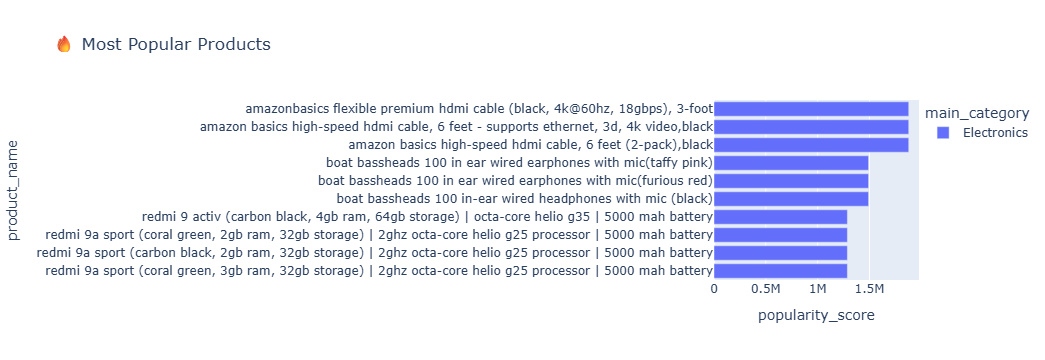

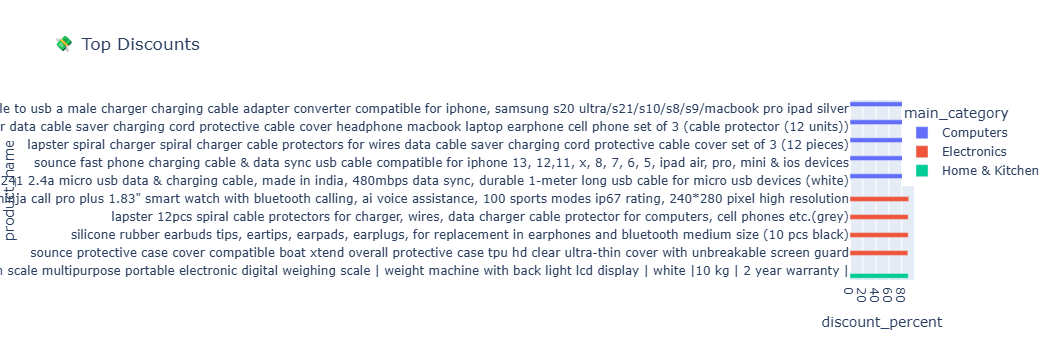

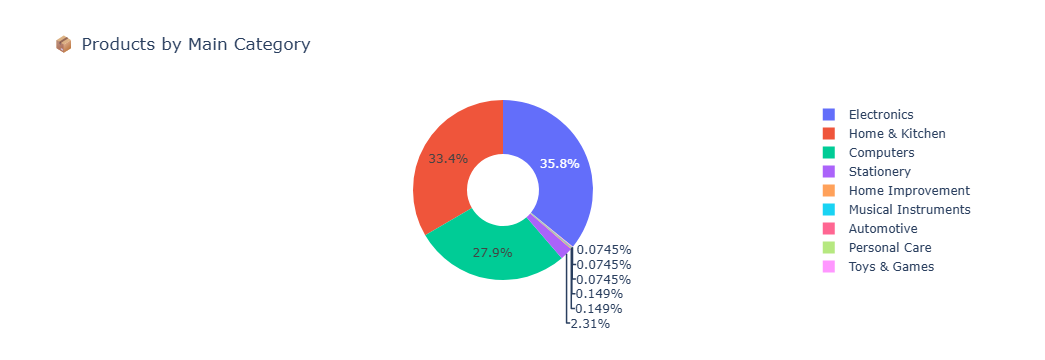

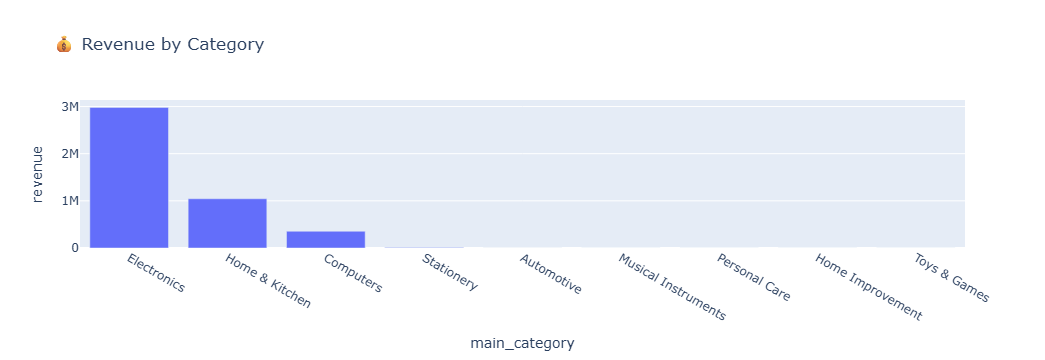

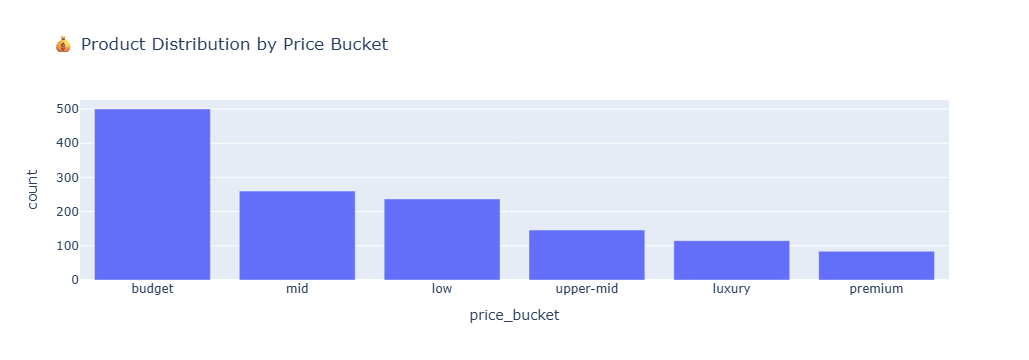

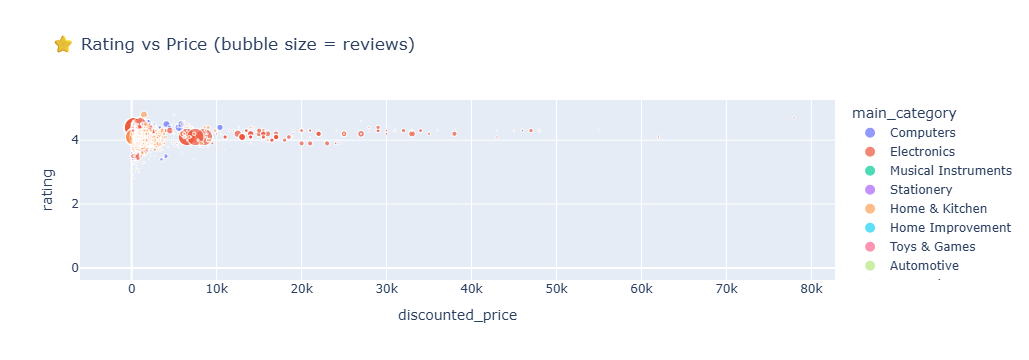


💲 Cheapest High Rated Products


,product_name,discounted_price,rating,main_category
0,classmate octane neon- blue gel pens(pack of 5...,50.0,4.3,Stationery
1,"gizga essentials webcam cover, privacy protect...",69.0,4.3,Computers
2,elv mobile phone mount tabletop holder for pho...,89.0,4.3,Electronics
3,parker quink ink bottle (black),90.0,4.3,Stationery
4,"3m post-it sticky note cube, 200 sheets (4 col...",90.0,4.4,Stationery



✅ Dashboard complete — SQL + Analytics executed successfully!


In [13]:
# =========================================================
# AMAZON SALES ANALYTICS DASHBOARD
# SQL-FIRST ARCHITECTURE (Professional / Industry Style)
# ETL handled by preprocessing.py
# =========================================================

import pandas as pd
import sqlite3
import plotly.express as px
from IPython.display import display


# =========================================================
# 1. CONNECT DATABASE
# =========================================================

db_path = r"C:\Users\acer\Downloads\amazon_sales.db"
conn = sqlite3.connect(db_path)

print("✅ Connected to database")


# =========================================================
# 2. LOAD DATA PREVIEW
# =========================================================

df = pd.read_sql("SELECT * FROM sales", conn)

print("Shape:", df.shape)
display(df.head())


# =========================================================
# 3. KPI METRICS
# =========================================================

kpis = pd.read_sql("""
SELECT
    COUNT(*) as total_products,
    ROUND(AVG(discount_percent),2) as avg_discount,
    ROUND(AVG(rating),2) as avg_rating,
    ROUND(SUM(discounted_price),2) as total_revenue
FROM sales
""", conn)

total_products = int(kpis.total_products[0])
avg_discount = kpis.avg_discount[0]
avg_rating = kpis.avg_rating[0]
total_revenue = int(kpis.total_revenue[0])

print("\n📊 ===== KPI SUMMARY =====")
print(f"📦 Total Products : {total_products:,}")
print(f"⭐ Avg Rating     : {avg_rating}")
print(f"💸 Avg Discount  : {avg_discount}%")
print(f"💰 Revenue       : ₹ {total_revenue:,}")


# =========================================================
# 4. MOST POPULAR PRODUCTS
# =========================================================

top_popular = pd.read_sql("""
SELECT product_name, popularity_score, main_category
FROM sales
ORDER BY popularity_score DESC
LIMIT 10
""", conn)

fig = px.bar(
    top_popular,
    x="popularity_score",
    y="product_name",
    color="main_category",
    orientation="h",
    title="🔥 Most Popular Products"
)

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


# =========================================================
# 5. BEST DISCOUNTS
# =========================================================

best_discounts = pd.read_sql("""
SELECT product_name, discount_percent, main_category
FROM sales
ORDER BY discount_percent DESC
LIMIT 10
""", conn)

fig = px.bar(
    best_discounts,
    x="discount_percent",
    y="product_name",
    color="main_category",
    orientation="h",
    title="💸 Top Discounts"
)

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


# =========================================================
# 6. CATEGORY DISTRIBUTION
# =========================================================

category = pd.read_sql("""
SELECT main_category, COUNT(*) as count
FROM sales
GROUP BY main_category
ORDER BY count DESC
""", conn)

fig = px.pie(
    category,
    names="main_category",
    values="count",
    hole=0.4,
    title="📦 Products by Main Category"
)

fig.show()


# =========================================================
# 7. REVENUE BY CATEGORY
# =========================================================

revenue_cat = pd.read_sql("""
SELECT main_category,
       ROUND(SUM(discounted_price),2) as revenue
FROM sales
GROUP BY main_category
ORDER BY revenue DESC
""", conn)

fig = px.bar(
    revenue_cat,
    x="main_category",
    y="revenue",
    title="💰 Revenue by Category"
)

fig.show()


# =========================================================
# 8. PRICE BUCKET DISTRIBUTION
# =========================================================

bucket = pd.read_sql("""
SELECT price_bucket, COUNT(*) as count
FROM sales
GROUP BY price_bucket
ORDER BY count DESC
""", conn)

fig = px.bar(
    bucket,
    x="price_bucket",
    y="count",
    title="💰 Product Distribution by Price Bucket"
)

fig.show()


# =========================================================
# 9. RATING VS PRICE SCATTER
# =========================================================

sample_df = pd.read_sql("""
SELECT discounted_price, rating, rating_count, main_category
FROM sales
WHERE rating_count > 50
""", conn)

fig = px.scatter(
    sample_df,
    x="discounted_price",
    y="rating",
    size="rating_count",
    color="main_category",
    title="⭐ Rating vs Price (bubble size = reviews)"
)

fig.show()


# =========================================================
# 10. CHEAPEST HIGH RATED
# =========================================================

cheap_high = pd.read_sql("""
SELECT product_name, discounted_price, rating, main_category
FROM sales
WHERE rating >= 4.3
ORDER BY discounted_price ASC
LIMIT 5
""", conn)

print("\n💲 Cheapest High Rated Products")
display(cheap_high)


# =========================================================
# 11. CLOSE CONNECTION
# =========================================================

conn.close()
print("\n✅ Dashboard complete — SQL + Analytics executed successfully!")
